In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the past weather dataset, it contains weather details for a particular date in the past
data=pd.read_csv('MaunaLoaDailyTemps .csv')
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [5]:
# data type information for the weather features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [6]:
# convert object data type to datetime data type for feature 'DATE'

data['DATE'] = pd.to_datetime(data['DATE'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1825 non-null   datetime64[ns]
 1   MinTemp  1821 non-null   float64       
 2   MaxTemp  1821 non-null   float64       
 3   AvgTemp  1821 non-null   float64       
 4   Sunrise  1825 non-null   int64         
 5   Sunset   1825 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 85.7 KB


In [8]:
#count missing values in a Pandas DataFrame
data.isna().sum()

DATE       0
MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [9]:
# drop record related to na
data = data.dropna()

In [10]:
data.isna().sum()

DATE       0
MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [11]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,657,1756
1,2014-01-02,35.0,50.0,43.0,657,1756
2,2014-01-03,36.0,45.0,41.0,657,1757
3,2014-01-04,32.0,41.0,37.0,658,1757
4,2014-01-05,24.0,38.0,31.0,658,1758


In [12]:
#fetch and add new year column from the 'DATE' feature which is datetime field

data['YEAR']= data['DATE'].dt.year

In [13]:
#fetch and add new month column from the 'DATE' feature which is datetime field

data['MONTH']= data['DATE'].dt.month

In [14]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,YEAR,MONTH
0,2014-01-01,33.0,46.0,40.0,657,1756,2014,1
1,2014-01-02,35.0,50.0,43.0,657,1756,2014,1
2,2014-01-03,36.0,45.0,41.0,657,1757,2014,1
3,2014-01-04,32.0,41.0,37.0,658,1757,2014,1
4,2014-01-05,24.0,38.0,31.0,658,1758,2014,1


In [15]:
#calculate the correlation coefficients between all pairs of columns in a DataFrame
data.corr()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,YEAR,MONTH
DATE,1.000000,0.053429,-0.000982,0.021973,-0.011647,-0.080985,0.979764,0.197419
MinTemp,0.053429,1.000000,0.756071,0.917456,-0.426821,0.300492,0.008075,0.227415
MaxTemp,-0.000982,0.756071,1.000000,0.951039,-0.374928,0.275876,-0.029029,0.137562
AvgTemp,0.021973,0.917456,0.951039,1.000000,-0.422829,0.304711,-0.015718,0.186884
Sunrise,-0.011647,-0.426821,-0.374928,-0.422829,1.000000,-0.739777,-0.002254,-0.049908
Sunset,-0.080985,0.300492,0.275876,0.304711,-0.739777,1.000000,0.002415,-0.415416
YEAR,0.979764,0.008075,-0.029029,-0.015718,-0.002254,0.002415,1.000000,-0.002077
MONTH,0.197419,0.227415,0.137562,0.186884,-0.049908,-0.415416,-0.002077,1.000000


In [16]:
#create a copy of original data 
ndata = data

In [17]:
ndata.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,YEAR,MONTH
0,2014-01-01,33.0,46.0,40.0,657,1756,2014,1
1,2014-01-02,35.0,50.0,43.0,657,1756,2014,1
2,2014-01-03,36.0,45.0,41.0,657,1757,2014,1
3,2014-01-04,32.0,41.0,37.0,658,1757,2014,1
4,2014-01-05,24.0,38.0,31.0,658,1758,2014,1


In [18]:
#drop all columns except average temperature
ndata = ndata.drop(columns = ['MinTemp','MaxTemp','Sunrise','Sunset','YEAR','MONTH'])

In [19]:
ndata

,DATE,AvgTemp
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0
...,...,...
1820,2018-12-26,40.0
1821,2018-12-27,39.0
1822,2018-12-28,40.0
1823,2018-12-29,42.0


In [20]:
#make 'DATE' feature as index column
ndata = ndata.set_index('DATE')

In [21]:
ndata

,AvgTemp
DATE,
2014-01-01,40.0
2014-01-02,43.0
2014-01-03,41.0
2014-01-04,37.0
2014-01-05,31.0
...,...
2018-12-26,40.0
2018-12-27,39.0
2018-12-28,40.0


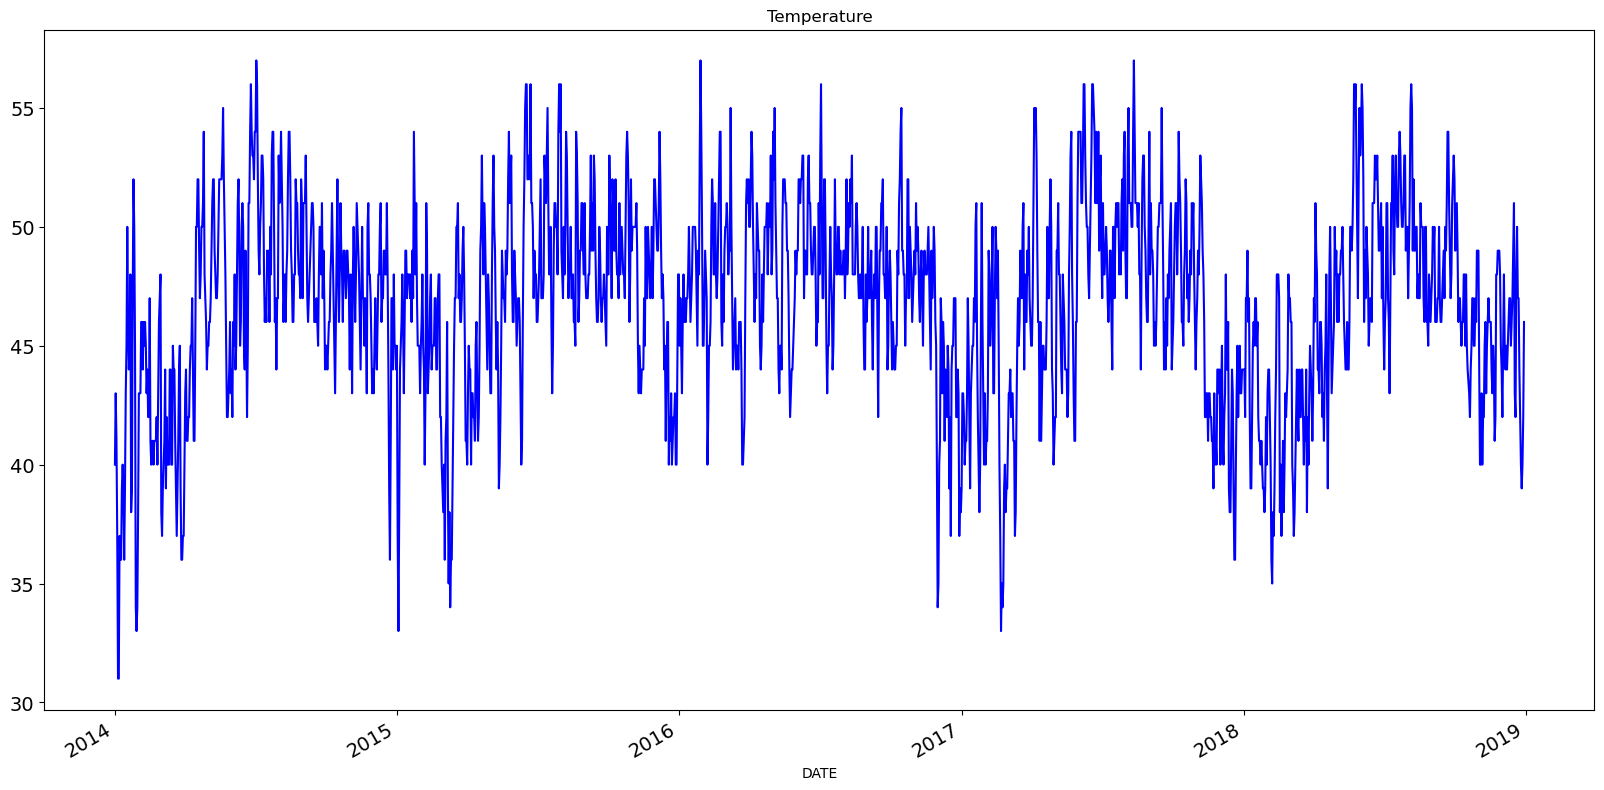

In [22]:
#plot average temperature against index column "DATE"
plt.figure(figsize=(20,10))
ndata.AvgTemp.plot(title ="Temperature",fontsize=14,color="blue")
plt.show()

In [23]:
#  adfuller function is used to perform the Augmented Dickey-Fuller (ADF) test, 
# a statistical hypothesis test commonly used to assess whether a time series is stationary.

from statsmodels.tsa.stattools import adfuller
def adf_test(ndata):
#     'AIC' (Akaike Information Criterion): This value sets the autolag argument to use the Akaike Information Criterion (AIC) for selecting the optimal number of lags.

     ndatatest = adfuller(ndata, autolag = 'AIC')
#     If the ADF statistic is more negative (or less positive) than the critical values and the p-value is below
#     a chosen significance level (commonly 0.05), you may conclude that the time series is likely stationary. 
#     Otherwise, you may fail to reject the null hypothesis of non-stationarity.
     print("1. ADF : ",ndatatest[0])
           # P-value indicates the probability of observing a test statistic (in this case, the ADF statistic),
#if p value is lesser than 0.05(commonly) it rejects null hypothesis and time series is stationary
     print("2. P-Value : ", ndatatest[1])
#     The number of lagged terms (past values) included in the ADF regression to account for autocorrelation.
# The regression will consider the current data point (t) along with the values at 12 previous time 
# steps (t-1, t-2, ..., t-12). These past values are the lagged terms.
     print("3. Num Of Lags : ", ndatatest[2])
#     The number of observations used in the ADF regression after accounting for lags.
     print("4. Num Of Observations Used For ADF Regression:",ndatatest[3])
     print("5. Critical Values :")
     for key, val in ndatatest[4].items():
         print("\t",key, ": ", val)
adf_test(ndata['AvgTemp'])

1. ADF :  -6.554680125068781
2. P-Value :  8.67593748019951e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [24]:
from pmdarima import auto_arima
# This function is used to automatically fit an ARIMA model to a time series.
# trace=True is an optional argument that tells auto_arima to print out information about the model selection process
# during fitting. This can be helpful for understanding how the model is chosen.
arimadata=auto_arima(ndata['AvgTemp'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.628, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=0.59 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.309, Time=0.83 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.373, Time=0.87 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=0.82 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.870, Time=1.03 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.247, Time=1.10 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.604, Time=1.21 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.343, Time=1.09 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [25]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [26]:
# divide the dataset into train and test, except last 30 rows all are train dataset
train=ndata.iloc[:-30]
test=ndata.iloc[-30:]
print(train.size,test.size,ndata.size)


1791 30 1821


In [27]:
# Statsmodels is a Python library that provides a comprehensive set of tools for statistical modeling, estimation,
# and hypothesis testing.
import statsmodels.api as sm
#using (1,0,5) from predicted auto_arima model
model=sm.tsa.arima.ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()


# Bayesian Information Criterion -- BIC

/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Wed, 20 Mar 2024   AIC                           8156.395
Time:                        18:30:45   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# Apply model on test data set by looping from end of train data set to end of data set which is test data set
start = len(train)
end = len(train)+len(test)-1
#predict on test data set
pred = model.predict(start=start,end=end,typ="levels").rename('Arima Predictions')
#index will be the date from original data set for the test data
pred.index=ndata.index[start:end+1]
print(pred)

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721546
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064
2018-12-15    45.961185
2018-12-16    45.970176
2018-12-17    45.979036
2018-12-18    45.987770
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045482
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075923
2018-12-30    46.083261
Name: Arima Predictions, dtype: float64


/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='DATE'>

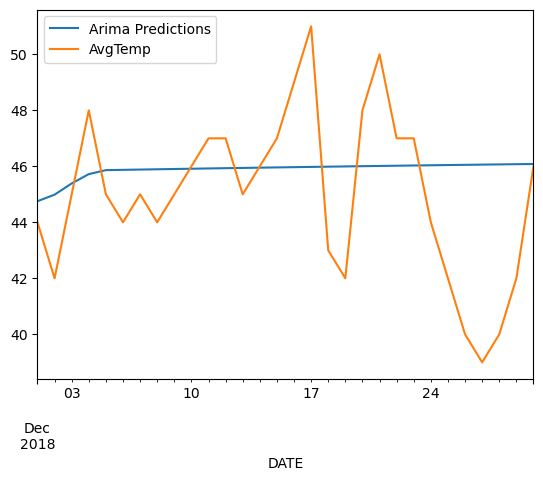

In [29]:
#plot the graph between predicted and actual values 
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [30]:
test['AvgTemp'].mean()

45.0

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
from math import sqrt

In [33]:
#average squared difference between the predicted values by a model and the actual values - MSE
# A lower RMSE indicates a better model fit, signifying that predictions are closer to the actual values on average.
rmse = sqrt(mean_squared_error(pred,test['AvgTemp']))
rmse

3.0004639189542495

In [34]:
model2=sm.tsa.arima.ARIMA(ndata['AvgTemp'],order=(1,0,5))
model2=model2.fit()

/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4138.130
Date:                Wed, 20 Mar 2024   AIC                           8292.261
Time:                        18:30:46   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5285      0.758     61.403      0.000      45.043      48.014
ar.L1          0.9860      0.005    192.909      0.000       0.976       0.996
ma.L1         -0.1403      0.023     -6.125      0.000      -0.185      -0.095
ma.L2         -0.2328      0.023    -10.038      0.000      -0.278      -0.187
ma.L3         -0.2163      0.023     -9.280      0.000      -0.262      -0.171
ma.L4         -0.1478      0.023     -6.542      0.000      -0.192      -0.104
ma.L5         -0.0587      0.024     -2.424      0.015      -0.106      -0.011
sigma2         5.5080      0.173     31.925      0.000       5.170       5.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.69
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
index_future_dates = pd.date_range(start="2018-12-30",end="2019-05-30")

In [37]:
index_future_dates

DatetimeIndex(['2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08',
               ...
               '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24',
               '2019-05-25', '2019-05-26', '2019-05-27', '2019-05-28',
               '2019-05-29', '2019-05-30'],
              dtype='datetime64[ns]', length=152, freq='D')

In [38]:
pred = model2.predict(start = len(ndata),end=len(ndata)+151,type="levels")
pred.index = index_future_dates

/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/apopatil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [39]:
pred.values

array([46.41816625, 46.11391211, 45.6178738 , 45.24956625, 45.11691584,
       45.13666628, 45.15614036, 45.17534197, 45.1942749 , 45.21294292,
       45.23134973, 45.24949899, 45.2673943 , 45.28503922, 45.30243725,
       45.31959185, 45.33650641, 45.35318431, 45.36962884, 45.38584328,
       45.40183085, 45.41759471, 45.433138  , 45.44846381, 45.46357518,
       45.47847511, 45.49316656, 45.50765244, 45.52193563, 45.53601897,
       45.54990526, 45.56359724, 45.57709765, 45.59040915, 45.6035344 ,
       45.616476  , 45.62923652, 45.64181849, 45.65422441, 45.66645674,
       45.67851792, 45.69041034, 45.70213636, 45.7136983 , 45.72509847,
       45.73633913, 45.7474225 , 45.7583508 , 45.76912618, 45.77975079,
       45.79022674, 45.80055612, 45.81074096, 45.82078329, 45.83068511,
       45.84044838, 45.85007504, 45.85956701, 45.86892616, 45.87815436,
       45.88725343, 45.89622519, 45.90507142, 45.91379386, 45.92239426,
       45.93087433, 45.93923574, 45.94748015, 45.95560921, 45.96

In [40]:
pred.keys()

DatetimeIndex(['2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08',
               ...
               '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24',
               '2019-05-25', '2019-05-26', '2019-05-27', '2019-05-28',
               '2019-05-29', '2019-05-30'],
              dtype='datetime64[ns]', length=152, freq='D')

<Axes: >

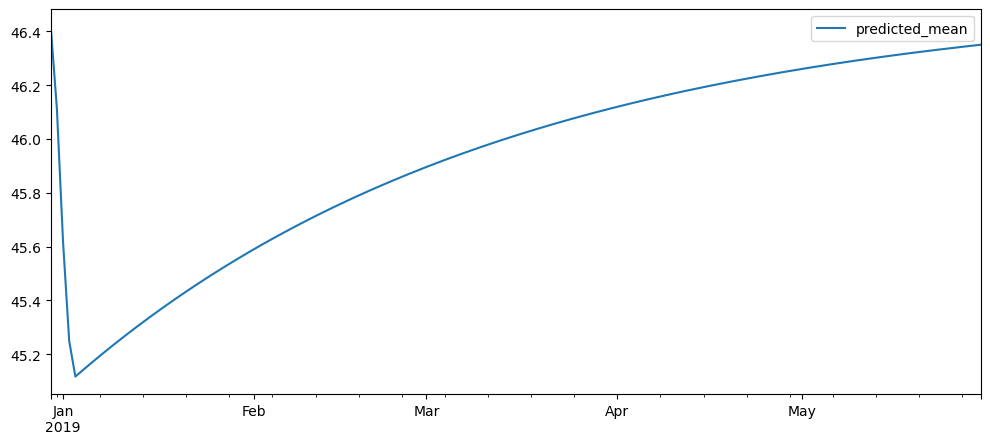

In [41]:
pred.plot(figsize=(12,5),legend=True)

dataset     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
test data set size 3850
Accuracy of Random Forest is 0.9945454545454545
['lentil']


/Users/apopatil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


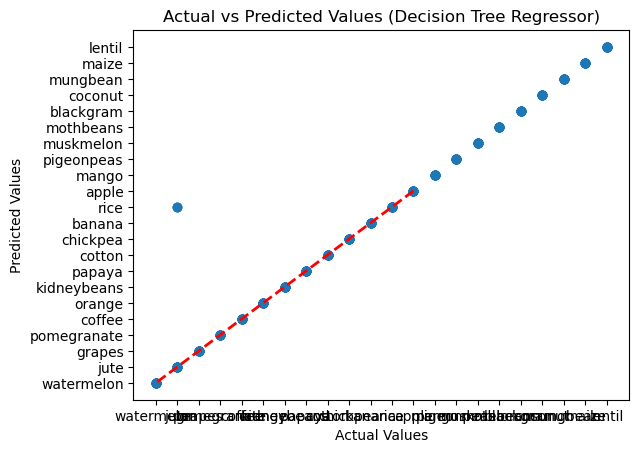

In [50]:
import numpy as np
import pandas as pd
#read the csv file
df = pd.read_csv('Crop_recommendation.csv')

#get first few rows from feature dataset
print("dataset",df.head())

#drop the column to be predicted i.e crop name
x = df.drop('label', axis = 1)

#store the crop names in y variable
y = df['label']

from sklearn.model_selection import train_test_split
#split the dataset into train and test data set
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, random_state = 1)

#check test data set
print("test data set size",x_test.size)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#It belongs to the category of ensemble learning methods, where multiple models (decision trees) are combined to improve overall accuracy and robustness.
model_4 = RandomForestClassifier(n_estimators = 25, random_state=2)

#train the model on training data set
model_4.fit(x_train.values, y_train.values)

#predict crop type on testing data set
y_pred_4 = model_4.predict(x_test)

#Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
random_fore_acc = accuracy_score(y_test, y_pred_4)
print("Accuracy of Random Forest is " + str(random_fore_acc))

#testing on random input data
arr = [[26,68,24,28.04849594,64.07691942,7.504930973,37.15824966]]

print(model_4.predict(arr))

# plot the dataset between actual and predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.show()



In [43]:
# arr = [[90,42,43,pred['2019-01-28'],82.002744,6.502985,202.935536]]
# for temp in pred.
crop_names = dict()

#here pred is output from weather prediction
for date,temp in pred.items():
    values = []
    arr = [[78,58,44,temp,80.88,5.10,284.436]]
    crop_pred = model_4.predict(arr)
    value_a = temp
    value_b = crop_pred
#     values.append(value_a, value_b[0])
    crop_names[date]=[value_a,value_b[0]]
print(crop_names)


        

    
    
    
    

{Timestamp('2018-12-30 00:00:00'): [46.418166245774195, 'rice'], Timestamp('2018-12-31 00:00:00'): [46.11391211235509, 'rice'], Timestamp('2019-01-01 00:00:00'): [45.61787379581158, 'rice'], Timestamp('2019-01-02 00:00:00'): [45.24956624980927, 'rice'], Timestamp('2019-01-03 00:00:00'): [45.11691584015006, 'rice'], Timestamp('2019-01-04 00:00:00'): [45.13666627775393, 'rice'], Timestamp('2019-01-05 00:00:00'): [45.156140364290195, 'rice'], Timestamp('2019-01-06 00:00:00'): [45.17534196650419, 'rice'], Timestamp('2019-01-07 00:00:00'): [45.194274897037175, 'rice'], Timestamp('2019-01-08 00:00:00'): [45.21294291518336, 'rice'], Timestamp('2019-01-09 00:00:00'): [45.23134972763638, 'rice'], Timestamp('2019-01-10 00:00:00'): [45.24949898922521, 'rice'], Timestamp('2019-01-11 00:00:00'): [45.26739430363995, 'rice'], Timestamp('2019-01-12 00:00:00'): [45.28503922414734, 'rice'], Timestamp('2019-01-13 00:00:00'): [45.302437254296244, 'rice'], Timestamp('2019-01-14 00:00:00'): [45.319591848613

head    Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  
dataset after removing duplicates       Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0 

/Users/apopatil/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.44141, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss : mae : 29907.604370717872 score : 0.7485842229351424
rg Ridge()
rg : mae : 29875.30211002505 score : 0.7485391150423042
knr KNeighborsRegressor()
knr : mae : 4856.872990167727 score : 0.982273984579586
dtr DecisionTreeRegressor()
dtr : mae : 4116.9072681704265 score : 0.9777607267526505


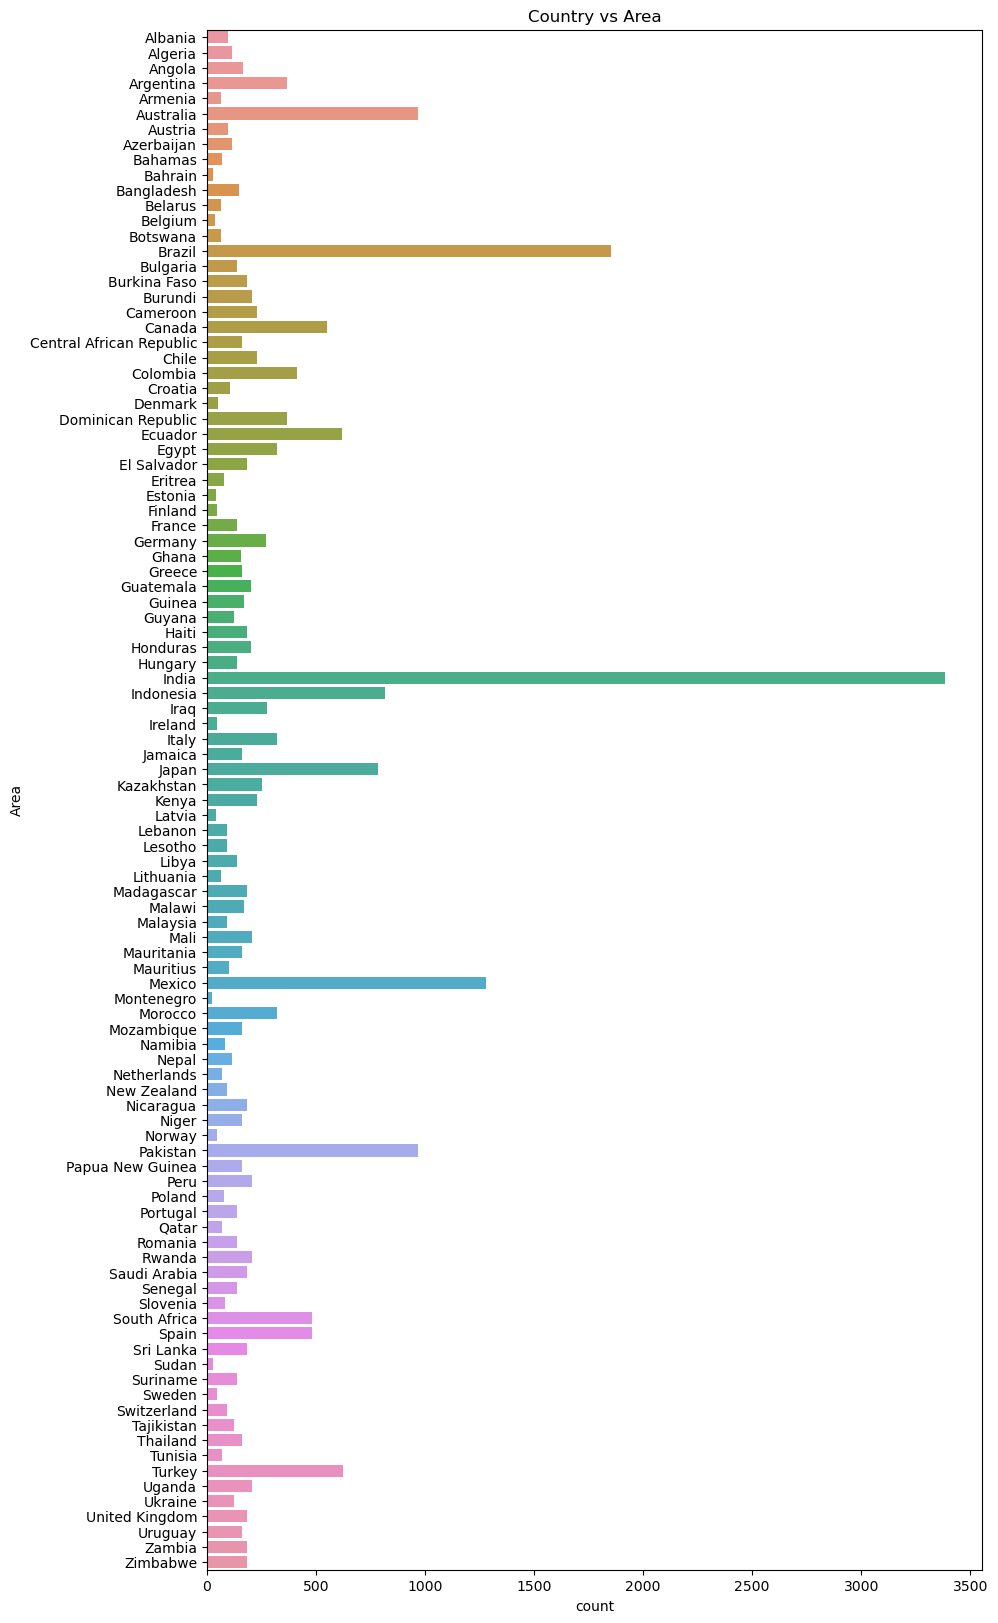

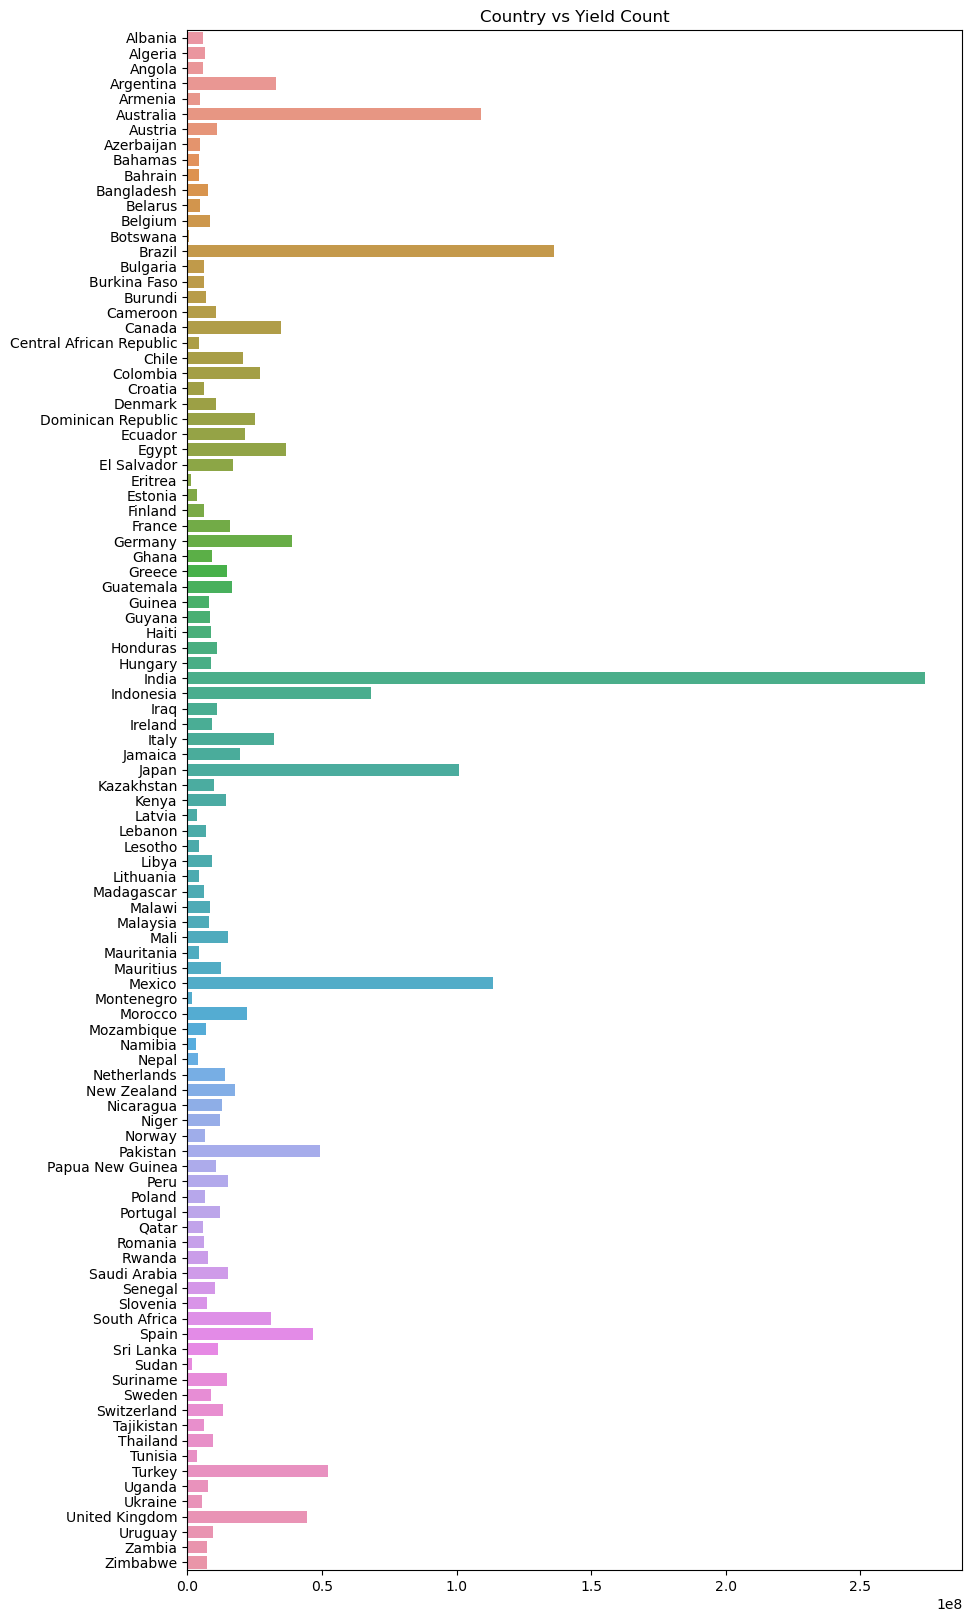

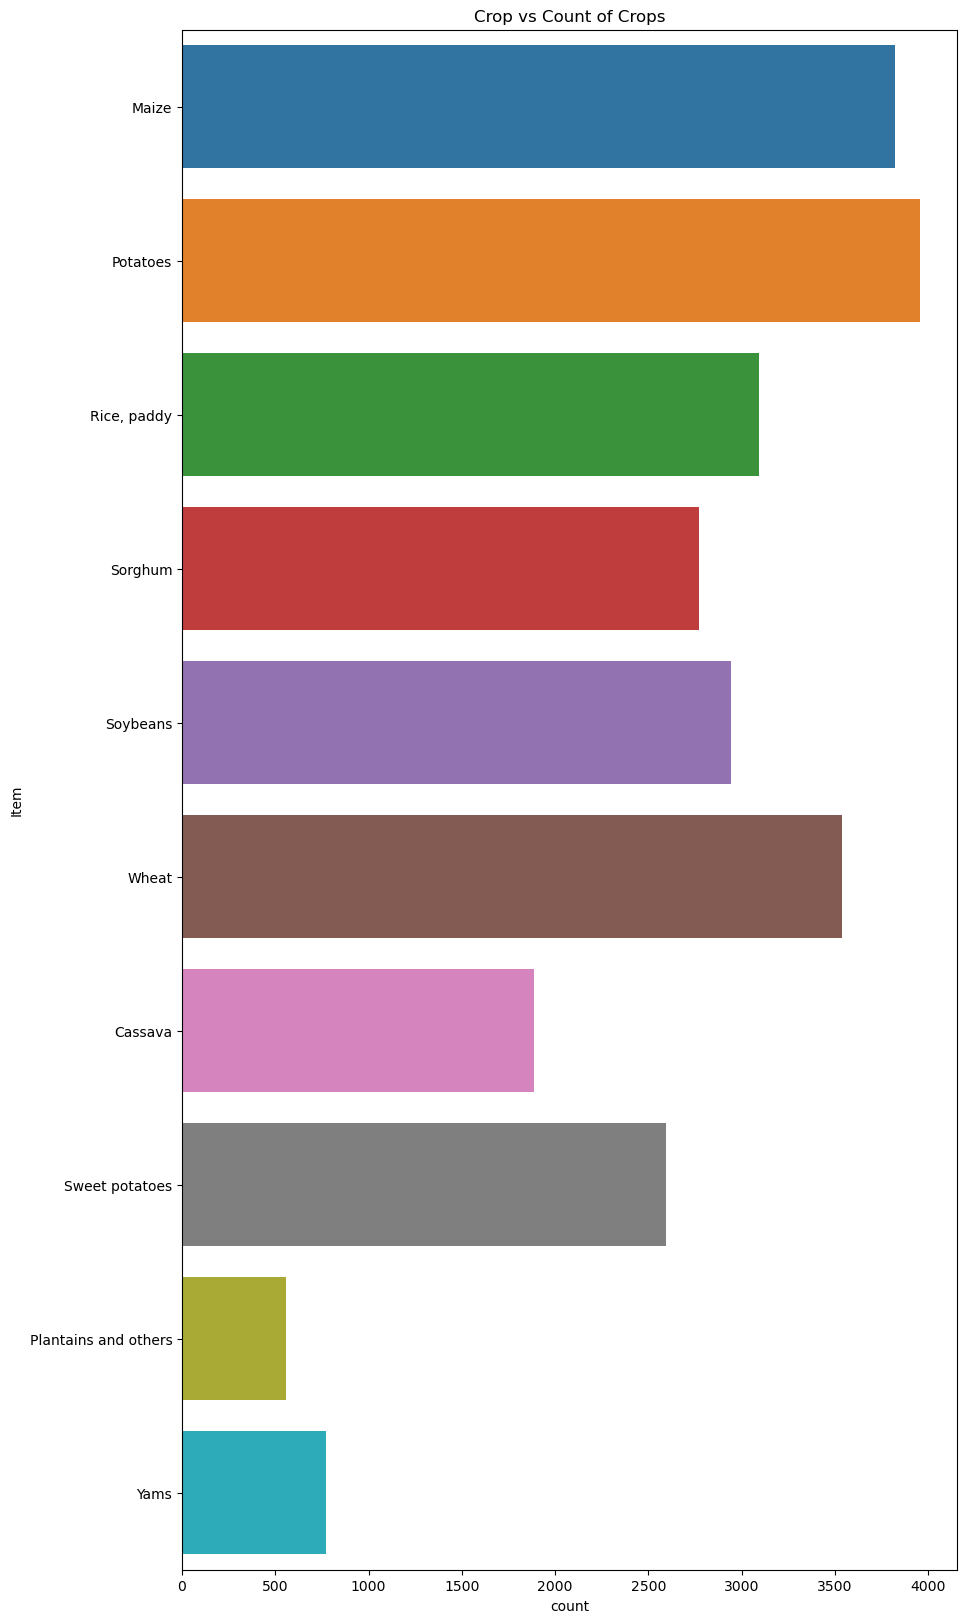

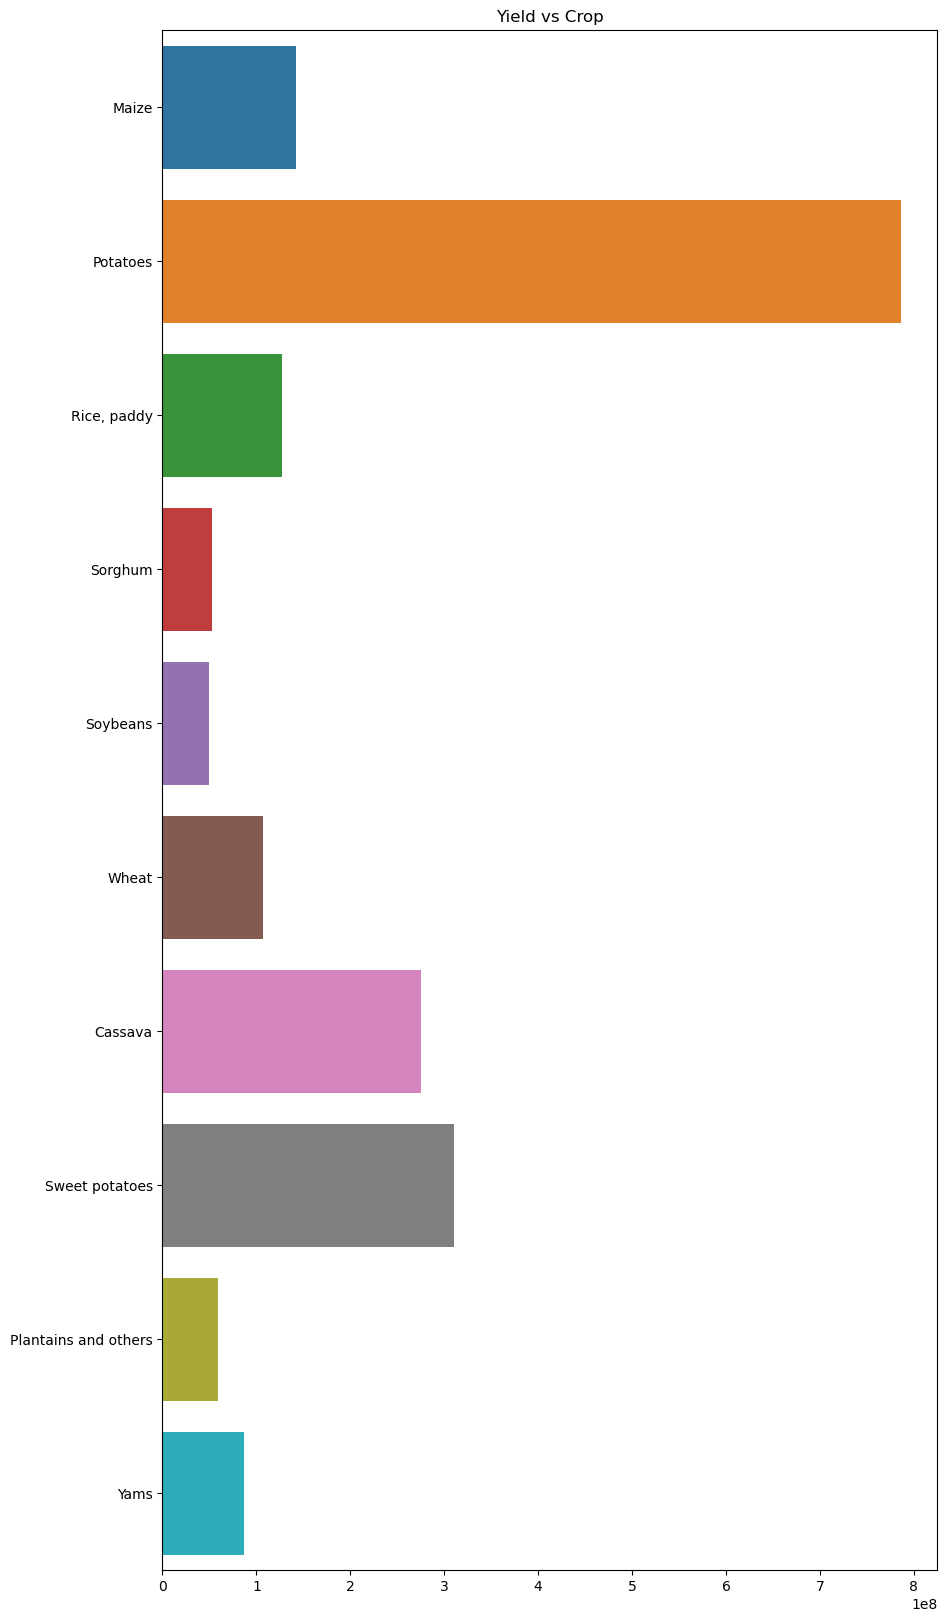

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#read the input data set 
df = pd.read_csv("yield_df.csv")

print("head",df.head())

#remove the column which is not helpful in predicting the yield
df.drop('Unnamed: 0',axis=1,inplace=True)

#check any null values exists in input dataset
df.isnull().sum()

# this command tells how many duplicate record exists in dataset
df.duplicated().sum()
#this command drops duplicates without changing the order
df.drop_duplicates(inplace=True)
df.duplicated().sum()
print("dataset after removing duplicates",df.head())

#plot count of how many records exist for each country
plt.figure(figsize=(10,20))
plt.title("Country vs No of records for each country")
sns.countplot(y=df['Area'])

#filter unique countries list
countries = df['Area'].unique()

yield_per_country = []
for country in countries:
    #append for each country matching yield records for different crops
    yield_per_country.append(df[df['Area']==country]['hg/ha_yield'].sum())
    

#plot country vs yield count 
plt.figure(figsize=(10,20))
plt.title("Country vs Yield Count")
sns.barplot(y=countries,x=yield_per_country)


#plot count of how many records exist for each crop
plt.figure(figsize=(10,20))
plt.title("Crop vs Count of Crops")
sns.countplot(y=df['Item'])


crops = df['Item'].unique()

yield_per_crop =[]
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

#plot crop vs crop yield count 
plt.figure(figsize=(10,20))
plt.title("Yield vs Crop")
sns.barplot(x=yield_per_crop,y=crops)

#re arrange the columns by moving the output parameter to the end
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]

#drop the value to be predicted from input
x= df.drop('hg/ha_yield',axis=1)

#take only the yield data i.e output in y
y=df['hg/ha_yield']


from sklearn.model_selection import train_test_split
#split the datatest into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

#encoding categorical variables into a one-hot vector representation
ohe= OneHotEncoder(drop="first")

#scale features (independent variables) to a common range, typically with a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()

#apply different preprocessing techniques to specific columns or groups of columns within your data.
preprocessor = ColumnTransformer(transformers = [('onehotencoder',ohe,[4,5]),('standrization',scaler,[0,1,2,3])],remainder="passthrough")


X_train_dummy = preprocessor.fit_transform(X_train)

X_test_dummy = preprocessor.transform(X_test)

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'knr':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()
}

# check for each models what is the MAE and chose the model which is having lesser value
for name,mod in models.items():
    print(name,mod)
    mod.fit(X_train_dummy,y_train)
    y_pred = mod.predict(X_test_dummy)
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")


# use decision tree regressor
dtr = DecisionTreeRegressor()

# fit decision tree regressor on train data set
dtr.fit(X_train_dummy,y_train)

# predict on test data set
y_pred_yield = dtr.predict(X_test_dummy)

def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocessor.transform(features)
    # Make the prediction
    predicted_yield = dtr.predict(transformed_features)
    predicted_yield_after_reshape = dtr.predict(transformed_features).reshape(1,-1)
    return predicted_yield_after_reshape

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'




In [46]:
for date,temp_crop in crop_names.items():
    print(temp_crop[0],temp_crop[1])
    result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, temp_crop[0], Area,"Rice, paddy")
    print("yeild for date {}: {}".format(date, result))

46.418166245774195 rice
yeild for date 2018-12-30 00:00:00: [[19388.]]
46.11391211235509 rice
yeild for date 2018-12-31 00:00:00: [[19388.]]
45.61787379581158 rice
yeild for date 2019-01-01 00:00:00: [[19388.]]
45.24956624980927 rice
yeild for date 2019-01-02 00:00:00: [[19388.]]
45.11691584015006 rice
yeild for date 2019-01-03 00:00:00: [[19388.]]
45.13666627775393 rice
yeild for date 2019-01-04 00:00:00: [[19388.]]
45.156140364290195 rice
yeild for date 2019-01-05 00:00:00: [[19388.]]
45.17534196650419 rice
yeild for date 2019-01-06 00:00:00: [[19388.]]
45.194274897037175 rice
yeild for date 2019-01-07 00:00:00: [[19388.]]
45.21294291518336 rice
yeild for date 2019-01-08 00:00:00: [[19388.]]
45.23134972763638 rice
yeild for date 2019-01-09 00:00:00: [[19388.]]
45.24949898922521 rice
yeild for date 2019-01-10 00:00:00: [[19388.]]
45.26739430363995 rice
yeild for date 2019-01-11 00:00:00: [[19388.]]
45.28503922414734 rice
yeild for date 2019-01-12 00:00:00: [[19388.]]
45.30243725429624

/Users/apopatil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Users/apopatil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/apopatil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Users/apopatil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/apopatil/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/Users/apopatil/anaconda3/lib/python3.11/si